# Ising and QUBO model

Let's define the Ising model $H$ with 3-variables $s_1, s_2,s_3 \in \{-1,1\}$ as follows
$$ H =  \sum_{i=1}^{3} h_i s_i + \sum_{i =1}^{3} \sum_{j =i + 1}^{3}J_{i,j} s_i s_j \,,$$
which is equivalent to 
$$ H =  h_1 s_1 + h_2 s_2 + h_3 s_3 +  J_{1,2} s_1 s_2 + J_{1,3} s_1 s_3 + J_{2,3} s_2 s_3\,.$$
Now we will rewrite in the form of a QUBO model $L$ by performing the transformation $s_i \mapsto 2 q_i - 1,$ leading to
$$ L =  h_1 (2 q_1 - 1) + h_2 (2 q_2 - 1) + h_3 (2 q_3 - 1) +  J_{1,2} (2 q_1 - 1) (2 q_2 - 1) + J_{1,3} (2 q_1 - 1) (2 q_3 - 1) + J_{2,3} (2 q_2 - 1) (2 q_3 - 1)\,.$$
$$ \Leftrightarrow $$
$$ L = 2(h_1 - J_{1,2} - J_{1,3}) q_1 + 2(h_2 - J_{1,2} - J_{2,3}) q_2 + 2(h_3 - J_{1,3} - J_{2,3}) q_3$$ 
$$ \quad + 4 J_{1,2} q_1 q_2 + 4 J_{1,3} q_1 q_3 + 4 J_{2,3} q_2 q_3$$
$$ \quad -(h_1 + h_2 + h_3 - J_{1,2} - J_{1,3} -J_{2,3}) $$
$$ \Leftrightarrow $$
$$ L =  a_1 q_1 + _2 q_2 + a_3 q_3 +  J_{1,2} q_1 q_2 + J_{1,3} q_1 q_3 + J_{2,3} q_2 q_3 + C$$
$$ \Leftrightarrow $$
$$ L =  \sum_{i=1}^{3} a_i q_i + \sum_{i =1}^{3} \sum_{j =i + 1}^{3}b_{i,j} q_i q_j + C \,.$$ 
Where $q_i \in \{0,1\}$ and the constant $C$ is called _offset_.

Assign some values to the unknown coefficients $h_i$ and $J_{i,j}\,,$

In [1]:
h1, h2, h3 = -1.0, 0.5, 0.2
J12, J13, J23 = 1.25, 1.0, 0.25

and calculate the QUBO coefficients,

In [2]:
a1 = 2 * (h1 - J12 - J13)
a2 = 2 * (h2 - J12 - J23)
a3 = 2 * (h3 - J13 - J23)
b12, b13, b23 = 4 * J12, 4 * J13, 4 * J23
C = -(h1 + h2 + h3 - J12 - J13 - J23)

print(f"a1, a2, a3 = {a1}, {a2}, {a3}")
print(f"b12, b13, b23 = {b12}, {b13}, {b23}")
print(f"C = {C}")

a1, a2, a3 = -6.5, -2.0, -2.1
b12, b13, b23 = 5.0, 4.0, 1.0
C = 2.8


The translation of the Ising model into a QUBO model can be done using the below Ocean's tools. Note that we will define $q_i$ instead of $s_i$ for the Ising model in order to get the QUBO model with variables $q_i$.

In [3]:
h = {'q1': h1, 'q2': h2, 'q3': h3}
J = {('q1', 'q2'): J12, ('q1', 'q3'): J13, ('q2', 'q3'): J23}

In [4]:
import dimod

In [5]:
L = dimod.ising_to_qubo(h, J)
L

({('q1', 'q1'): -6.5,
  ('q2', 'q2'): -2.0,
  ('q3', 'q3'): -2.1,
  ('q1', 'q2'): 5.0,
  ('q1', 'q3'): 4.0,
  ('q2', 'q3'): 1.0},
 2.8)

The method outputs the values as pairs, which indicates the values of the graph representation of this QUBO model (ignoring the offset $C=2.8$).

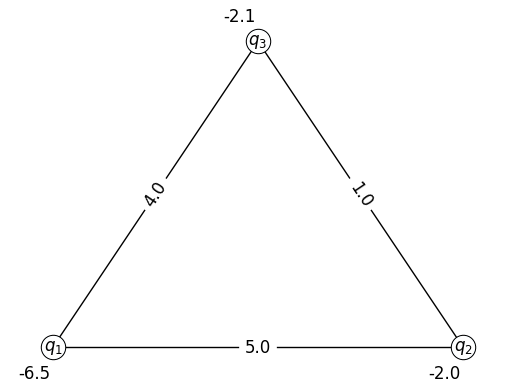

In [6]:
import networkx as nx

G = nx.Graph()

q_1, q_2, q_3 = '$q_1$', '$q_2$', '$q_3$'
edges = [(q_1, q_2), (q_1, q_3), (q_2, q_3)]

G.add_edges_from(edges)

nx.set_node_attributes(G, {q_1: {'a': a1}, q_2: {'a': a2}, q_3: {'a': a3}})

node_states = nx.get_node_attributes(G, 'a')

nx.set_edge_attributes(G, {(q_1, q_2): {'b': b12}, (q_1, q_3): {'b': b13}, 
                           (q_2, q_3): {'b': b23}})

edge_labels = nx.get_edge_attributes(G, 'b')

pos = nx.planar_layout(G)
s = 0.09
state_pos = {q_1: (-1 - s, -0.33 - s), q_2: ( 1 - s, -0.33 - s), 
             q_3: ( 0 - s,  0.66 + s)}

nodes = nx.draw_networkx_nodes(G, pos)

nodes.set_edgecolor('black')

nx.draw_planar(G, edge_color='black', with_labels=True, node_size=250, 
               node_color='white')

nx.draw_networkx_labels(G, state_pos, labels=node_states, font_size=12) 

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12);
print()

On the above graph the numbers on the edges are the coefficients $b_{i,\,j}$ (quadratic/coupling) and the numbers on the nodes (qubits) are the coefficients $a_i$ (linear/bias).

We can return to the original Ising model using the transformation $x_i \mapsto \frac{s_i +1}{2}\,.$

In [7]:
H = dimod.qubo_to_ising(L[0])
H

({'q1': -1.0, 'q2': 0.5, 'q3': 0.19999999999999996},
 {('q1', 'q2'): 1.25, ('q1', 'q3'): 1.0, ('q2', 'q3'): 0.25},
 -2.8)

## Exact solution

Without to much computational complexity, we can calculate all $2^3$ possible solution of the Ising model $H$ as follows.

In [8]:
solution_ising = lambda s1, s2, s3: h1 * s1 + h2 * s2 + h3 * s3 + \
J12 * s1 * s2 + J13 * s1 * s3 + J23 * s2 * s3

In [9]:
print(f"s1 =  1, s2 =  1, s3 =  1, H = {solution_ising(1, 1, 1)} \n" 
      f"s1 = -1, s2 =  1, s3 =  1, H = {solution_ising(-1, 1, 1)} \n"
      f"s1 = -1, s2 = -1, s3 =  1, H = {solution_ising(-1, -1, 1)} \n"
      f"s1 = -1, s2 = -1, s3 = -1, H = {solution_ising(-1, -1, -1)} \n"
      f"s1 = -1, s2 =  1, s3 = -1, H = {solution_ising(-1, 1, -1)} \n"
      f"s1 =  1, s2 =  1, s3 = -1, H = {solution_ising(1, 1, -1)} \n"
      f"s1 =  1, s2 = -1, s3 = -1, H = {solution_ising(1, -1, -1)} \n"
      f"s1 =  1, s2 = -1, s3 =  1, H = {solution_ising(1, -1, 1)} \n")

s1 =  1, s2 =  1, s3 =  1, H = 2.2 
s1 = -1, s2 =  1, s3 =  1, H = -0.30000000000000004 
s1 = -1, s2 = -1, s3 =  1, H = 0.7 
s1 = -1, s2 = -1, s3 = -1, H = 2.8 
s1 = -1, s2 =  1, s3 = -1, H = 0.8 
s1 =  1, s2 =  1, s3 = -1, H = -0.7 
s1 =  1, s2 = -1, s3 = -1, H = -3.7 
s1 =  1, s2 = -1, s3 =  1, H = -1.7999999999999998 



The optimal solution that minimizes $H$ is $s_1 =  1, s_2 = -1, s_3 = -1\,.$ Calculate the solution for the QUBO model $L$.

In [10]:
solution_qubo = lambda q1, q2, q3: a1 * q1 + a2 * a2 + a3 * a3 + \
b12 * q1 * q2 + b13 * q1 * q3 + b23 * q2 * q3 + C

In [11]:
print(f"q1 =  1, q2 =  1, q3 =  1, L = {solution_qubo(1, 1, 1)} \n" 
      f"q1 =  0, q2 =  1, q3 =  1, L = {solution_qubo(0, 1, 1)} \n"
      f"q1 =  0, q2 =  0, q3 =  1, L = {solution_qubo(0, 0, 1)} \n"
      f"q1 =  0, q2 =  0, q3 =  0, L = {solution_qubo(0, 0, 0)} \n"
      f"q1 =  0, q2 =  1, q3 =  0, L = {solution_qubo(0, 1, 0)} \n"
      f"q1 =  1, q2 =  1, q3 =  0, L = {solution_qubo(1, 1, 0)} \n"
      f"q1 =  1, q2 =  0, q3 =  0, L = {solution_qubo(1, 0, 0)} \n"
      f"q1 =  1, q2 =  0, q3 =  1, L = {solution_qubo(1, 0, 1)} \n")

q1 =  1, q2 =  1, q3 =  1, L = 14.71 
q1 =  0, q2 =  1, q3 =  1, L = 12.21 
q1 =  0, q2 =  0, q3 =  1, L = 11.21 
q1 =  0, q2 =  0, q3 =  0, L = 11.21 
q1 =  0, q2 =  1, q3 =  0, L = 11.21 
q1 =  1, q2 =  1, q3 =  0, L = 9.71 
q1 =  1, q2 =  0, q3 =  0, L = 4.71 
q1 =  1, q2 =  0, q3 =  1, L = 8.71 



The optimal solution that minimizes $L$ is $s_1 =  1, s_2 = 0, s_3 = 0\,.$ Due to the relation between the two models we could simply perform the transformation to get the QUBO solution.

In [12]:
q1 = (1 + 1) / 2 
q2 = (-1 + 1) / 2 
q3 = (-1 + 1) / 2 
print(f"q1 = {q1}, q2 = {q2}, q3 = {q3}")

q1 = 1.0, q2 = 0.0, q3 = 0.0


## Simulated annealing

With the knowledge of the Ising model optimal solution  $s_1 =  1, s_2 = -1, s_3 = -1\,,$ we will search for it using simulated annealing.

In [13]:
from neal import SimulatedAnnealingSampler

In order to use Ocean's tools, the Ising model needs to be set as a Binary Quadratic Model (BQM)

In [14]:
bqm_h = dimod.BQM.from_ising(h, J)

Run 10 times the algorithm. Note that it will run on the local CPU.

In [15]:
sa_h_samples = SimulatedAnnealingSampler().sample(bqm_h, num_reads=10)

In [16]:
print(sa_h_samples)

  q1 q2 q3 energy num_oc.
0 +1 -1 -1   -3.7       1
1 +1 -1 -1   -3.7       1
2 +1 -1 -1   -3.7       1
3 +1 -1 -1   -3.7       1
4 +1 -1 -1   -3.7       1
5 +1 -1 -1   -3.7       1
6 +1 -1 -1   -3.7       1
7 +1 -1 -1   -3.7       1
8 +1 -1 -1   -3.7       1
9 +1 -1 -1   -3.7       1
['SPIN', 10 rows, 10 samples, 3 variables]


Given the simplicity of this example, it is not surprising that each sample returns the optimal value. Let's due the same for the QUBO model. Here we need to define the QUBO without the constant $C,$ this is achieved by inputing the first element of the tuple $L$. The rationale behind ignoring the constant is that we are looking for an $argmin$. For a better understanding, note that the minimum of the real-valued function $f(x)= x^2 + c$ is at value $x=0$ for all translations of the solution by a real constant $c\,.$  

In [17]:
bqm_l = dimod.BQM.from_qubo(L[0])

In [18]:
sa_l_samples = SimulatedAnnealingSampler().sample(bqm_l, num_reads=10)

In [19]:
print(sa_l_samples)

  q1 q2 q3 energy num_oc.
0  1  0  0   -6.5       1
1  1  0  0   -6.5       1
2  1  0  0   -6.5       1
3  1  0  0   -6.5       1
4  1  0  0   -6.5       1
5  1  0  0   -6.5       1
6  1  0  0   -6.5       1
7  1  0  0   -6.5       1
8  1  0  0   -6.5       1
9  1  0  0   -6.5       1
['BINARY', 10 rows, 10 samples, 3 variables]


# Problem to QUBO

A common problem in finance is the allocation of capital (budget) in some assets in order to generate (ideally) some future profit. As a toy example, suppose an investor wants to maximize the allocation of $N$ EUR into $3$ assets and denote the asset by $q_i$ and current price by $p_i$ with 
$i=1,\,\dots\,3$. The mathematically translation of this problem is 

$$\max_{q_i} \left( N - \sum_{i=1}^{3} p_i q_i \right) $$

with $q_i \in \{0,\,1\}$ and $p_i > 0\,.$ To solve this problem using D-Wave quantum processor unit (QPU) we need to transform the problem into a QUBO minimization problem. Multiplying the objective (cost) function 

$$\left( N - \sum_{i=1}^{3} p_i q_i \right)$$

by -1 we change the problem from maximization to minimization

$$\min_{q_i} \left( - N + \sum_{i=1}^{3} p_i q_i \right) \,.$$ 

If we square the objective function we get

$$ \left(\sum_{i=1}^{3} p_i q_i\right)^2 -2 \left(N\sum_{i=1}^{3} p_i q_i\right) + N^2$$  

$$ \Leftrightarrow $$

$$ \sum_{i=1}^{3} p_i^2 q_i^2  -2 \left(N\sum_{i=1}^{3} p_i q_i\right) + 2 \sum_{i=1}^{3} \sum_{j = i + 1}^{3} p_i p_j q_i q_j + N^2\,.$$

Since $q_i \in \{0,\,1 \}$ we have $q_i^2 = q_i\,,$ hence,

$$ \sum_{i=1}^{3} p_i^2 q_i  - \sum_{i=1}^{3} 2 N p_i q_i + 2 \sum_{i=1}^{3} \sum_{j = i + 1}^{3} p_i p_j q_i q_j + N^2\,$$

$$ \Leftrightarrow $$

$$ \sum_{i=1}^{3} \left(p_i^2 - 2 Np_i \right) q_i + 2 \sum_{i=1}^{3} \sum_{j = i + 1}^{3} p_i p_j q_i q_j + N^2\,.$$

If we set $a_i = (p_i^2 - 2 Np_i)\,,$ $b_{i,\,j} = 2 p_i p_j$ and 
$C = N^2$ we obtain the equivalent QUBO formulation $L$ of the initial problem

$$ L = \sum_{i=1}^{3} a_i q_i + \sum_{i=1}^{3} \sum_{j = i + 1}^{3} b_{i,\,j} q_i q_j + C\,.$$

Assign some values to the asset prices and use _pyqubo_ package to do the above calculations computationally.

In [20]:
p1, p2, p3 = 39.5, 3.6, 87.8
N = 100

In [21]:
from pyqubo import Binary as bit

In [22]:
q1, q2, q3 = bit("q1"), bit("q2"), bit("q3")

In [23]:
function = (- N + p1 * q1 + p2 * q2 +  p3 * q3)**2
model = function.compile()

In [24]:
L = model.to_qubo()
L

({('q1', 'q1'): -6339.75,
  ('q3', 'q1'): 6936.2,
  ('q2', 'q1'): 284.40000000000003,
  ('q3', 'q3'): -9851.16,
  ('q3', 'q2'): 632.16,
  ('q2', 'q2'): -707.04},
 10000.0)

## Exact solver

We can calculate all the $2^3$ possible solutions using the _ExactSolver_ method. Note that this method (solver) should be used for problems with a small number of variables.

In [25]:
ex_sampler = dimod.ExactSolver()
qubo_sample_set = ex_sampler.sample_qubo(L[0])

In [26]:
print(qubo_sample_set)

  q1 q2 q3   energy num_oc.
4  0  1  1 -9926.04       1
3  0  0  1 -9851.16       1
2  1  0  1 -9254.71       1
5  1  1  1 -9045.19       1
6  1  1  0 -6762.39       1
1  1  0  0 -6339.75       1
7  0  1  0  -707.04       1
0  0  0  0      0.0       1
['BINARY', 8 rows, 8 samples, 3 variables]


The solution is to allocate on asset $q_2$ and $q_3\,.$ Alternative, we can set as a Binary Quadratic Model (BQM).

In [28]:
bqm = model.to_bqm()
bqm_sample_set = ex_sampler.sample(bqm)
print(bqm_sample_set)

  q1 q2 q3  energy num_oc.
6  0  1  1   73.96       1
1  0  0  1  148.84       1
2  1  0  1  745.29       1
5  1  1  1  954.81       1
4  1  1  0 3237.61       1
3  1  0  0 3660.25       1
7  0  1  0 9292.96       1
0  0  0  0 10000.0       1
['BINARY', 8 rows, 8 samples, 3 variables]


The optimal solution $q_1 = 0,\, q_2 = 1,\, q_3 = 1$ implies that $100 - 91.3 = 8.7$ EUR is not allocated.


## Run on a quantum annealer processor

Let's see the proprieties of a quantum annealer process with a _Pegasus_ topology. See __[Pegasus Graph](https://docs.dwavesys.com/docs/latest/c_gs_4.html#topology-intro-pegasus)__ for more information.

In [29]:
from dwave.system import DWaveSampler

In [30]:
qpu_sampler = DWaveSampler(solver={'topology__type': 'pegasus'})

In [31]:
list(qpu_sampler.properties)

['num_qubits',
 'qubits',
 'couplers',
 'h_range',
 'j_range',
 'supported_problem_types',
 'parameters',
 'vfyc',
 'anneal_offset_ranges',
 'anneal_offset_step',
 'anneal_offset_step_phi0',
 'annealing_time_range',
 'chip_id',
 'default_annealing_time',
 'default_programming_thermalization',
 'default_readout_thermalization',
 'extended_j_range',
 'h_gain_schedule_range',
 'max_anneal_schedule_points',
 'max_h_gain_schedule_points',
 'num_reads_range',
 'per_qubit_coupling_range',
 'problem_run_duration_range',
 'problem_timing_data',
 'programming_thermalization_range',
 'readout_thermalization_range',
 'tags',
 'topology',
 'category',
 'quota_conversion_rate']

In [32]:
qpu_sampler.properties['chip_id']

'Advantage_system6.2'

In [33]:
qpu_sampler.properties['num_qubits']

5760

This QPU (_Advantage_system6.2_) has $5760$ qubits, which is a significant improvement related to D-Waves 2000Q processor (_Chimera_ graph and $2048$ qubits). Note that the problem bias (linear) and coupling (quadratic) coefficients are rescaled to a range of allowed values.

In [34]:
qpu_sampler.properties['h_range']

[-4.0, 4.0]

In [35]:
qpu_sampler.properties['j_range']

[-1.0, 1.0]

The _default_annealing_time_ (microseconds $\mu s$) for one read is of particular interest given the $1$ minute = $60,000,000$ $\mu s$ available to run problems with a trial plan account type. 

In [36]:
qpu_sampler.properties["default_annealing_time"]    

20.0

See  __[Solver Properties](https://docs.dwavesys.com/docs/latest/c_solver_properties.html#)__ for more information. We can also see the possible input parameters when solving a problem.

In [37]:
list(qpu_sampler.parameters.keys())

['anneal_offsets',
 'anneal_schedule',
 'annealing_time',
 'answer_mode',
 'auto_scale',
 'flux_biases',
 'flux_drift_compensation',
 'h_gain_schedule',
 'initial_state',
 'max_answers',
 'num_reads',
 'num_spin_reversal_transforms',
 'programming_thermalization',
 'readout_thermalization',
 'reduce_intersample_correlation',
 'reinitialize_state',
 'warnings',
 'label']

Run the capital allocation problem without the need to embed the problem into the graph topology.

In [39]:
from dwave.system import EmbeddingComposite

In [40]:
pegasus_sampler = EmbeddingComposite(qpu_sampler)

We will run $3$ times with a $3 \mu s$ per read, the default is $20 \mu s\,.$ Note that when rerunning the cell below the results might be different.

In [41]:
sample_results = pegasus_sampler.sample(bqm, num_reads=3, annealing_time=3, 
                                        label='capital_allocation')

In [42]:
print(sample_results)

  q1 q2 q3 energy num_oc. chain_.
0  0  1  1  73.96       2     0.0
1  0  0  1 148.84       1     0.0
['BINARY', 2 rows, 3 samples, 3 variables]


$2$ out of $3$ samples (reads) resulted in the optimal solution $q_1=0, q_2=1, q_3=1\,.$ The _chain_ value is the percentage of chain breaks. In this toy example it is expected to be zero, since the _Pegasus_ topology can embed a 3-loop (triangle graph) without additional physical qubits per logical qubit.

We can confirm the quantum annealing time and other information.

In [43]:
sample_results.info

{'timing': {'qpu_sampling_time': 179.04,
  'qpu_anneal_time_per_sample': 3.0,
  'qpu_readout_time_per_sample': 36.14,
  'qpu_access_time': 16105.41,
  'qpu_access_overhead_time': 2143.59,
  'qpu_programming_time': 15926.37,
  'qpu_delay_time_per_sample': 20.54,
  'total_post_processing_time': 188.0,
  'post_processing_overhead_time': 188.0},
 'problem_id': '8197de07-70a3-4297-98a0-a50402110cf6',
 'problem_label': 'capital_allocation'}

Use _dwave.inspector_  to visualize which qubits on the traged QPU where used to solve this problem. Note that _dwave.inspector.show_ is an interactive window connected to the server.

In [44]:
import dwave.inspector

Note that when rerunning this notebook the embedding might be different.

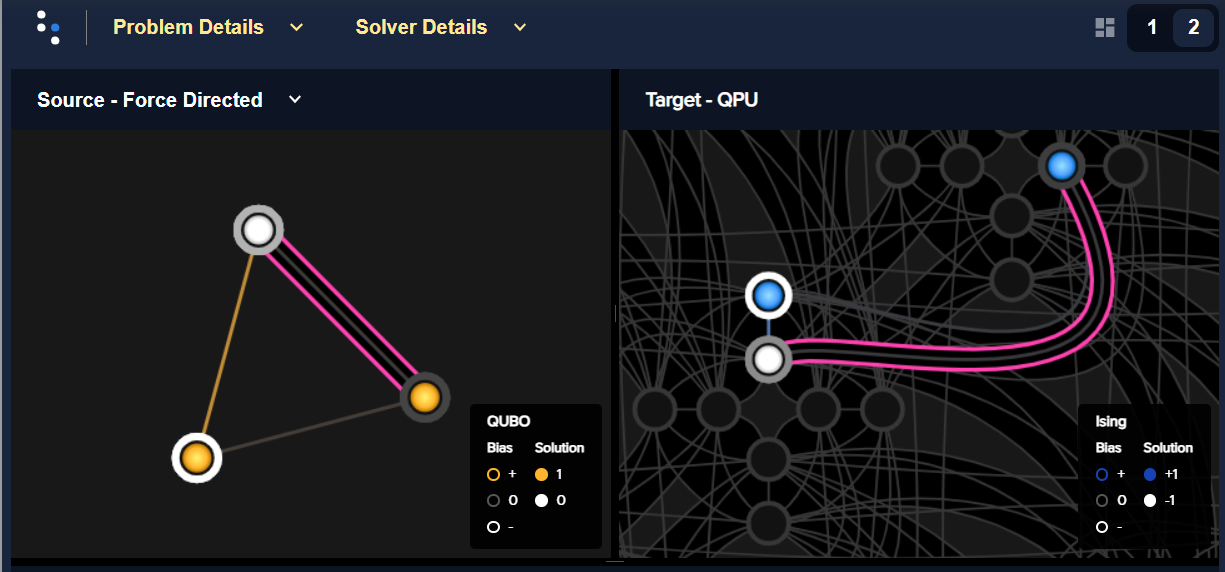

In [45]:
dwave.inspector.show(sample_results)

## Run on a Hybrid solver

It is also possible to use quantum-classical hybrid solvers. From __[Using Leap’s Hybrid Solvers](https://docs.dwavesys.com/docs/latest/doc_leap_hybrid.html)__ documentation:

"_These solvers, which implement state-of-the-art classical algorithms together with intelligent allocation of the quantum computer to parts of the problem where it benefits most, are designed to accommodate even very large problems. Leap's hybrid solvers enable you to benefit from D-Wave's deep investment in researching, developing, optimizing, and maintaining hybrid algorithms._" 

Let's solve the investors' problem using a hybrid solver. 

In [46]:
from dwave.system import LeapHybridSampler

In [47]:
hb_sampler = LeapHybridSampler(solver={'category': 'hybrid'})

In [48]:
hb_sampler.properties

{'minimum_time_limit': [[1, 3.0],
  [1024, 3.0],
  [4096, 10.0],
  [10000, 40.0],
  [30000, 200.0],
  [100000, 600.0],
  [1000000, 600.0]],
 'maximum_time_limit_hrs': 24.0,
 'maximum_number_of_variables': 1000000,
 'maximum_number_of_biases': 200000000,
 'parameters': {'time_limit': 'Maximum requested runtime in seconds.'},
 'supported_problem_types': ['bqm'],
 'category': 'hybrid',
 'version': '2.1',
 'quota_conversion_rate': 20}

In [49]:
hb_sampler.parameters

{'time_limit': ['parameters'], 'label': []}

In [50]:
hb_sample_results = hb_sampler.sample(bqm, time_limit=3,
                                     label='hb_solver_capital_allocation')

In [51]:
print(hb_sample_results)

  q1 q2 q3 energy num_oc.
0  0  1  1  73.96       1
['BINARY', 1 rows, 1 samples, 3 variables]


$$ $$

# Problem constrains

Now suppose the investor wants to allocate $N$ EUR into $3$ out of $5$ assets. This new problem is mathematically formulated as follows
$$\max_{q_i} \left( N - \sum_{i=1}^{5} p_i q_i \right) $$
$$ s.t. \qquad \sum_{i=1}^{5} q_i = 3 \,.$$
We know the QUBO translation of the objective function, i.e,
$$ L = \sum_{i=1}^{5} a_i q_i + \sum_{i=1}^{5} \sum_{j = i + 1}^{5} b_{i,\,j} q_i q_j + C\,,$$
but we need to incorporate the constraint. We can do that by adding
$$ \left( \sum_{i=1}^{5} q_i - 3 \right)^2 \,$$
to the QUBO objection function (ignoring $C$)
$$ L = \sum_{i=1}^{5} a_i q_i + \sum_{i=1}^{5} \sum_{j = i + 1}^{5} b_{i,\,j} q_i q_j + \lambda \left( \sum_{i=1}^{5} q_i - 3 \right)^2 \,.$$
The parameter $\lambda$ is the Lagrange multiplier, also called penalty's strength in the context of quantum annealing.This problem will need a chain of physical qubits (logical qubit) in order to embed it into the _Pegasus_ graph (which can be an input). As a result, we have one additional parameters of freedom to improve the search for solutions. Note that the magnitude is a guess and usually is of the same magnitude as the coefficients of
$$ \left( \sum_{i=1}^{5} q_i - 3 \right)^2 \,.$$

Solve the squared constrain.

In [52]:
q1, q2, q3, q4, q5 = bit("q1"), bit("q2"), bit("q3"), bit("q4"), bit("q5")

constraint = (-3  + q1 + q2 +  q3 + q4 + q5)**2

constraint_model = constraint.compile()

C = constraint_model.to_qubo()
C

({('q1', 'q1'): -5.0,
  ('q5', 'q2'): 2.0,
  ('q5', 'q3'): 2.0,
  ('q4', 'q3'): 2.0,
  ('q5', 'q4'): 2.0,
  ('q3', 'q3'): -5.0,
  ('q2', 'q1'): 2.0,
  ('q4', 'q2'): 2.0,
  ('q4', 'q4'): -5.0,
  ('q4', 'q1'): 2.0,
  ('q3', 'q1'): 2.0,
  ('q3', 'q2'): 2.0,
  ('q5', 'q5'): -5.0,
  ('q5', 'q1'): 2.0,
  ('q2', 'q2'): -5.0},
 9.0)

We will guess $\lambda=4\,,$ set the chain strength to $6\,,$ and run it $3$ times.

In [53]:
p1, p2, p3, p4, p5 = 39.5, 3.6, 87.8, 16.8, 50.8
N = 100
lamb = 4

objective_function = (- N + p1 * q1 + p2 * q2 +  p3 * q3
                     + p4 * q4 + p5 * q5)**2
lamb_constraint = lamb * (-3  + q1 + q2 +  q3 + q4 + q5)**2

problem = objective_function + lamb_constraint

model = problem.compile()
const_qubo = model.to_qubo()
const_qubo

({('q1', 'q1'): -6359.75,
  ('q5', 'q2'): 373.76,
  ('q5', 'q3'): 8928.48,
  ('q4', 'q3'): 2958.08,
  ('q5', 'q4'): 1714.8799999999999,
  ('q3', 'q3'): -9871.16,
  ('q2', 'q1'): 292.40000000000003,
  ('q4', 'q2'): 128.96,
  ('q4', 'q4'): -3097.76,
  ('q4', 'q1'): 1335.2,
  ('q3', 'q1'): 6944.2,
  ('q3', 'q2'): 640.16,
  ('q5', 'q5'): -7599.360000000001,
  ('q5', 'q1'): 4021.2,
  ('q2', 'q2'): -727.04},
 10036.0)

Note that when rerunning the cell below the results might be different.

In [82]:
const_sample_results = pegasus_sampler.sample_qubo(const_qubo[0],
                                                   num_reads=3, 
                                                   annealing_time=3,
                                                   chain_strength = 6,
                                    label='constrained_capital_allocation')

In [83]:
print(const_sample_results)

  q1 q2 q3 q4 q5   energy num_oc. chain_.
0  1  1  0  0  1 -9998.79       1     0.2
1  1  0  1  0  0 -9286.71       2     0.2
['BINARY', 2 rows, 3 samples, 5 variables]


The solution (lowest energy) is to allocate on assets $q_1, q_2$ and $q_5\,.$ Note that there was a _chain break_, i.e, the physical qubits representing the logical qubit have different values. Let's set the chain_strength to $1000$ and rerun.

Note that when rerunning the cell below the results might be different.

In [84]:
const_sample_results = pegasus_sampler.sample_qubo(const_qubo[0],
                                                   num_reads=3, 
                                                   annealing_time=3,
                                                   chain_strength = 1000,
                        label='1000_chain_s_constrained_capital_allocation')

In [85]:
print(const_sample_results)

  q1 q2 q3 q4 q5    energy num_oc. chain_.
0  0  0  1  1  0 -10010.84       1     0.0
1  1  0  0  1  1  -9985.59       1     0.0
2  0  1  1  1  0  -9968.76       1     0.0
['BINARY', 3 rows, 3 samples, 5 variables]


No _chain_break_ occurred, however, the solutions are not optimal or not feasible. When working with real problems the number of reads should be increased as well the annealing time, but here the goal was to show the heuristic and probabilistic nature of quantum annealing, meaning that it has the potential to search for solutions of hard optimization problems but it is not guaranteed that the solution is feasible or optimal.

## Run on a Hybrid CQM solver

Instead of calculating the QUBO model we can define it as a Constrained Quadratic Model (CQM) and run on an Hybrid CQM solver.

In [86]:
from dimod import Binary

In [87]:
cqm = dimod.ConstrainedQuadraticModel()

In [88]:
q1, q2, q3 = Binary("q1"), Binary("q2"), Binary("q3")
q4, q5 = Binary("q4"), Binary("q5")

objective_function = (- N + p1 * q1 + p2 * q2 +  p3 * q3 + p4 * q4 + p5 * q5)**2

cqm.set_objective(objective_function)

In [89]:
constrain = q1 + q2 +  q3 + q4 + q5

cqm.add_constraint(constrain == 3, label='Choose only 3 assets')

'Choose only 3 assets'

In [90]:
print(cqm)

Constrained quadratic model: 5 variables, 1 constraints, 20 biases

Objective
  10000 - 6339.75*Binary('q1') - 707.04*Binary('q2') - 9851.16*Binary('q3') - 3077.76*Binary('q4') - 7579.360000000001*Binary('q5') + 284.40000000000003*Binary('q1')*Binary('q2') + 6936.2*Binary('q1')*Binary('q3') + 632.16*Binary('q2')*Binary('q3') + 1327.2*Binary('q1')*Binary('q4') + 120.96000000000001*Binary('q2')*Binary('q4') + 2950.08*Binary('q3')*Binary('q4') + 4013.2*Binary('q1')*Binary('q5') + 365.76*Binary('q2')*Binary('q5') + 8920.48*Binary('q3')*Binary('q5') + 1706.8799999999999*Binary('q4')*Binary('q5')

Constraints
  Choose only 3 assets: Binary('q1') + Binary('q2') + Binary('q3') + Binary('q4') + Binary('q5') == 3.0

Bounds



In addition, suppose the investor wants to allocate at least $50$ EUR. This is translated as an inequality constraint.

In [91]:
ineq_constrain = p1 * q1 + p2 * q2 +  p3 * q3 + p4 *q4 + p5 * q5
print(ineq_constrain)
cqm.add_constraint(ineq_constrain >= 50, label='Invest at least 50 EUR')

BinaryQuadraticModel({'q1': 39.5, 'q2': 3.6, 'q3': 87.8, 'q4': 16.8, 'q5': 50.8}, {}, 0.0, 'BINARY')


'Invest at least 50 EUR'

In [92]:
print(cqm)

Constrained quadratic model: 5 variables, 2 constraints, 25 biases

Objective
  10000 - 6339.75*Binary('q1') - 707.04*Binary('q2') - 9851.16*Binary('q3') - 3077.76*Binary('q4') - 7579.360000000001*Binary('q5') + 284.40000000000003*Binary('q1')*Binary('q2') + 6936.2*Binary('q1')*Binary('q3') + 632.16*Binary('q2')*Binary('q3') + 1327.2*Binary('q1')*Binary('q4') + 120.96000000000001*Binary('q2')*Binary('q4') + 2950.08*Binary('q3')*Binary('q4') + 4013.2*Binary('q1')*Binary('q5') + 365.76*Binary('q2')*Binary('q5') + 8920.48*Binary('q3')*Binary('q5') + 1706.8799999999999*Binary('q4')*Binary('q5')

Constraints
  Choose only 3 assets: Binary('q1') + Binary('q2') + Binary('q3') + Binary('q4') + Binary('q5') == 3.0
  Invest at least 50 EUR: 39.5*Binary('q1') + 3.6*Binary('q2') + 87.8*Binary('q3') + 16.8*Binary('q4') + 50.8*Binary('q5') >= 50.0

Bounds



In [93]:
from dwave.system import LeapHybridCQMSampler

In [94]:
cqm_hb_sampler = LeapHybridCQMSampler()

In [95]:
cqm_hb_sample_results = cqm_hb_sampler.sample_cqm(cqm, time_limit=5, 
                                     label='hb_cqm_capital_allocation')

In [96]:
print(cqm_hb_sample_results.lowest())

   q1  q2  q3  q4  q5 energy num_oc. is_sat. is_fea.
0 0.0 0.0 1.0 1.0 0.0  21.16       1 arra...   False
1 0.0 0.0 1.0 1.0 0.0  21.16       1 arra...   False
2 0.0 0.0 1.0 1.0 0.0  21.16       1 arra...   False
3 0.0 0.0 1.0 1.0 0.0  21.16       1 arra...   False
['INTEGER', 4 rows, 4 samples, 5 variables]


The lowest energy results are not feasible solutions (do not verify at least one constrain) but we can search for the first feasible solution, if exists.

In [97]:
import itertools

In [98]:
first_feasible = next(itertools.filterfalse(lambda d: not 
                                            getattr(d, 'is_feasible'),
                                            list(cqm_hb_sample_results.data())))
first_feasible

Sample(sample={'q1': 1.0, 'q2': 1.0, 'q3': 0.0, 'q4': 0.0, 'q5': 1.0}, energy=37.20999999999981, num_occurrences=1, is_satisfied=array([ True,  True]), is_feasible=True)

The first feasible solution is to allocate on assets $q_1, q_2,$ and $q_5\,,$ which is the optimal solution.

$$ $$

# Embedding

So far we have run the problems without concerning about the graph (problem) embedding into the QPU. We will see the embedding of the investor's problem with the equality constrain.

In [99]:
const_sample_results.info['embedding_context']

{'embedding': {'q5': (4951,),
  'q1': (250,),
  'q2': (4890, 236),
  'q3': (265,),
  'q4': (4966,)},
 'chain_break_method': 'majority_vote',
 'embedding_parameters': {},
 'chain_strength': 1000}

Note that when you rerunning the above cell the embedding might be different.

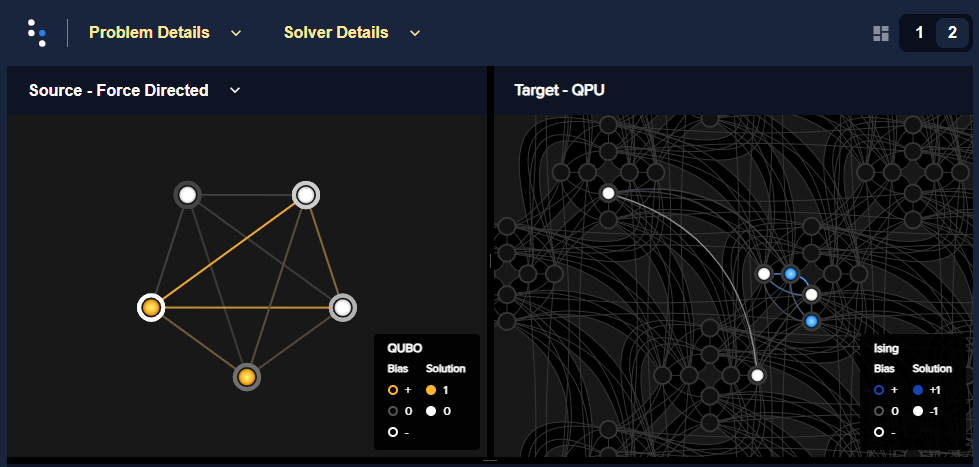

In [101]:
dwave.inspector.show(const_sample_results)

We can see that the problem is translated into a fully-connected graph (_clique_) and that one additional qubit was used, such that the physical pair $(4890, 236)$ represents the logical qubit $q_2.$ We can choose a different mapping as follows (see __[Minor-Embedding](https://docs.ocean.dwavesys.com/en/stable/concepts/embedding.html)__ documentation).

In [102]:
from dwave.system import FixedEmbeddingComposite

In [103]:
new_emdedding = {'q1': [4408, 2437],
                 'q2': [4333], 
                 'q3': [4348], 
                 'q4': [2497], 
                 'q5': [2512]}

In [104]:
fixed_embedding_sampler = FixedEmbeddingComposite(DWaveSampler(), 
                                                  embedding=new_emdedding)    

In [105]:
fixed_embedding_sampler.properties['embedding']

{'q1': (4408, 2437),
 'q2': (4333,),
 'q3': (4348,),
 'q4': (2497,),
 'q5': (2512,)}

In [106]:
const_bqm = model.to_bqm()
const_bqm

BinaryQuadraticModel({'q4': -3097.76, 'q1': -6359.75, 'q5': -7599.360000000001, 'q2': -727.04, 'q3': -9871.16}, {('q1', 'q4'): 1335.2, ('q5', 'q4'): 1714.8799999999999, ('q5', 'q1'): 4021.2, ('q2', 'q4'): 128.96, ('q2', 'q1'): 292.40000000000003, ('q2', 'q5'): 373.76, ('q3', 'q4'): 2958.08, ('q3', 'q1'): 6944.2, ('q3', 'q5'): 8928.48, ('q3', 'q2'): 640.16}, 10036.0, 'BINARY')

In [123]:
emdedding_sample_results = fixed_embedding_sampler.sample(const_bqm,
                                                         num_reads=3, 
                                                         annealing_time=3,
                                                         chain_strength = 1000,
                              label='enmbedding_constrained_capital_allocation')

In [124]:
print(emdedding_sample_results)

  q1 q2 q3 q4 q5 energy num_oc. chain_.
1  1  1  0  0  1  37.21       1     0.0
0  1  1  0  1  1 118.49       1     0.2
2  1  1  1  0  0 954.81       1     0.0
['BINARY', 3 rows, 3 samples, 5 variables]


Confirm the embedding and visualize it.

In [129]:
emdedding_sample_results.info['embedding_context']

{'embedding': {'q1': (4408, 2437),
  'q2': (4333,),
  'q3': (4348,),
  'q4': (2497,),
  'q5': (2512,)},
 'chain_break_method': 'majority_vote',
 'embedding_parameters': {},
 'chain_strength': 1000}

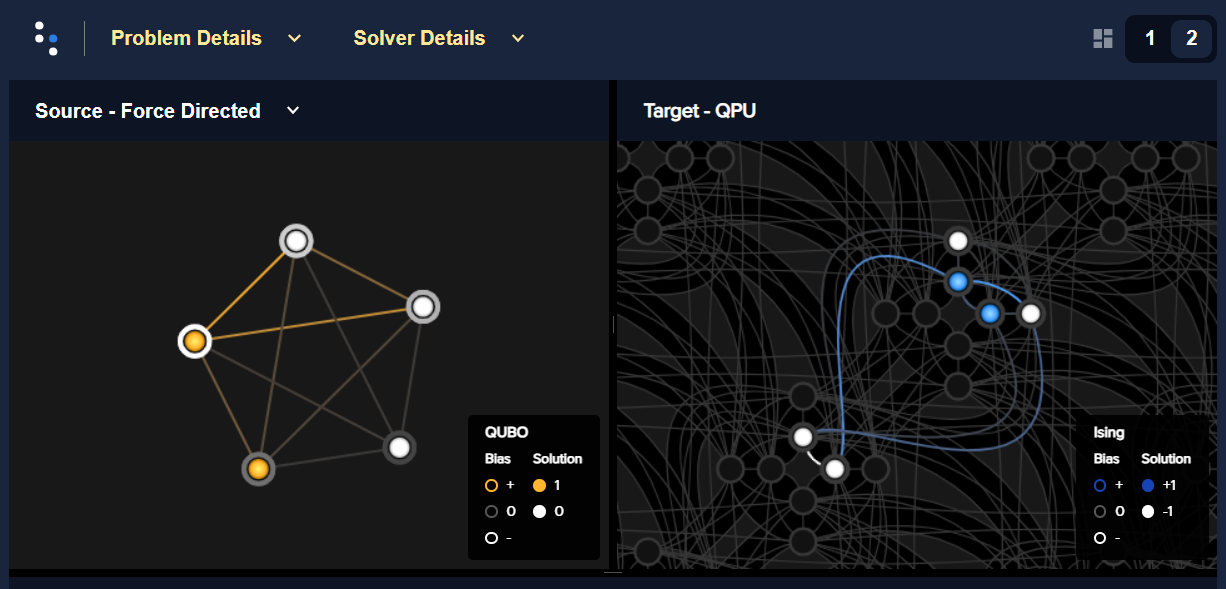

In [130]:
dwave.inspector.show(emdedding_sample_results)